Data preview:
   first  second
0      2       4
1      4       5
2      2       5
3      1       4
4      4       6
The list of the 10 largest differences is: [17650, 17650, 17647, 17647, 17644, 17644, 17643, 17643, 17639, 17639]
Average difference: 3855.7239970612345
Standard deviation of differences: 6364.775028021208


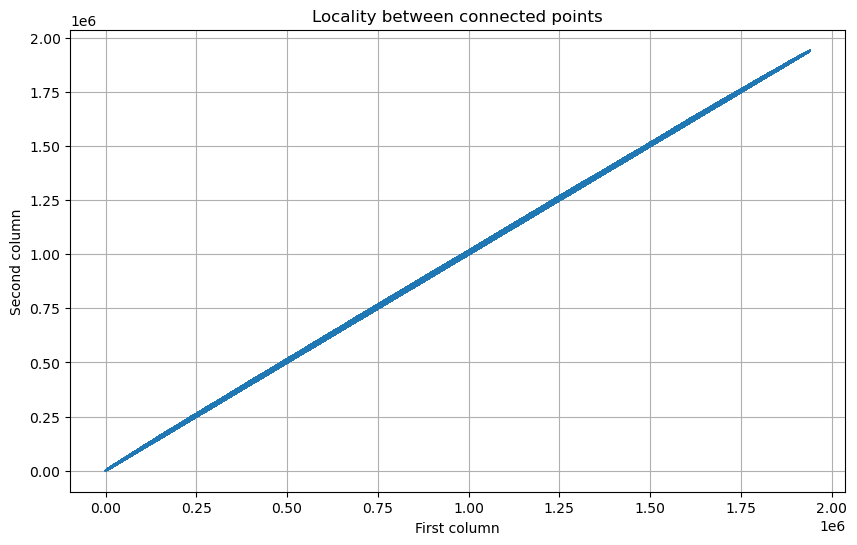

In [10]:
import pandas as pd

import matplotlib.pyplot as plt

# Path to the CSV file
csv_file = '../build/stats.csv'

# Read the CSV file into a DataFrame
try:
    data = pd.read_csv(csv_file)
except FileNotFoundError:
    print(f"Error: File not found at {csv_file}")
    exit()

# Check the structure of the data
print("Data preview:")
print(data.head())

# Strip leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Ensure the CSV has the expected columns
if data.shape[1] < 2:
    print("Error: The CSV file must have at least two columns for plotting.")
    exit()

# Plot the data
plt.figure(figsize=(10, 6))

plt.plot(data['first'], data['second'])

# Calculate the absolute difference between the two columns
data['difference'] = abs(data['first'] - data['second'])

# Find the 10th maximum difference in descending order
tenth_max_difference = data['difference'].nlargest(10).iloc[-1]

# Print the list of the 10 largest differences
largest_differences = data['difference'].nlargest(10).tolist()
print(f"The list of the 10 largest differences is: {largest_differences}")

# Calculate the average and standard deviation of the 'difference' column
avg_difference = data['difference'].mean()
std_difference = data['difference'].std()

# Print the average and standard deviation
print(f"Average difference: {avg_difference}")
print(f"Standard deviation of differences: {std_difference}")


# Add labels, title, and legend
plt.xlabel("First column")
plt.ylabel("Second column")
plt.title("Locality between connected points")
plt.grid(True)

# Show the plot
plt.show()